In [3]:
! pip install seaborn -q


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


# Types of Experimental Designs

## 1. Pre-Experimental Design
- **Characteristics:** 
  - Lacks randomization and control groups.
  - Often used for preliminary or exploratory purposes.
  - Provides initial insights but cannot establish causality.
  
- **Example in Titanic Dataset:** Investigating the relationship between passenger class (`Pclass`) and survival.

## 2. Quasi-Experimental Design
- **Characteristics:** 
  - Uses naturally occurring groups instead of random assignment.
  - May have some control over variables, but not as rigorous as true experiments.
  - Useful for real-world settings where randomization is not feasible.
  
- **Example in Titanic Dataset:** Investigating the relationship between port of embarkation (`Embarked`) and survival.

## 3. True Experimental Design
- **Characteristics:** 
  - Involves random assignment of subjects to experimental and control groups.
  - Provides the highest level of scientific rigor and control over confounding variables.
  - Can establish causality between variables.
  
- **Example in Titanic Dataset:** A hypothetical example could be randomly assigning passengers to lifeboats to test survival rates, but this is not ethical or feasible with the Titanic dataset.

### Examples with the Titanic Dataset

#### Pre-Experimental Design with `Pclass`
**Objective:** Investigate the relationship between passenger class (`Pclass`) and survival.

**Why Pre-Experimental?**
- No randomization: We simply observed the existing data without assigning passengers to classes.
- No control group: All classes are treated equally without a specific control group.
- Exploratory: Provides preliminary insights into survival rates by class.

**Steps:**
1. Load the data and handle missing values.
2. Calculate survival rates for each passenger class.
3. Visualize survival rates using bar plots.
4. Perform the Chi-Square Test to assess the relationship between `Pclass` and survival.

#### Quasi-Experimental Design with `Embarked`
**Objective:** Investigate if the port of embarkation (`Embarked`) affects survival rates.

**Why Quasi-Experimental?**
- Uses naturally occurring groups: Passengers are grouped by their port of embarkation.
- No randomization: We did not randomly assign passengers to different ports.
- Some control: We analyze the relationship while controlling for other variables through statistical methods.

**Steps:**
1. Load the data and handle missing values.
2. Calculate survival rates for each port of embarkation.
3. Visualize survival rates using bar plots.
4. Perform the Chi-Square Test to assess the relationship between `Embarked` and survival.

#### True Experimental Design
**Objective:** Establish causality between an intervention and outcome (hypothetical example).

**Why True Experimental?**
- Random assignment: Subjects are randomly assigned to experimental and control groups.
- Control group: A control group is used for comparison.
- High rigor: Provides the most rigorous control over confounding variables, allowing for causal inferences.

**Example (Hypothetical and Unethical with Titanic Data):**
- Randomly assign passengers to lifeboats to test survival rates.
- Clearly, this is not feasible or ethical with the Titanic dataset, but it's the type of design used in clinical trials or controlled laboratory experiments.

### Summary

- **Pre-Experimental Design:** Used to explore the relationship between `Pclass` and survival. No randomization or control groups are involved, making it suitable for preliminary insights.

- **Quasi-Experimental Design:** Used to investigate the impact of `Embarked` on survival. It uses naturally occurring groups without randomization, offering some control but not as rigorous as true experiments.

- **True Experimental Design:** Although not applicable to the Titanic dataset due to ethical and feasibility issues, it involves random assignment and control groups to establish causality.

* **Reference:** https://www.wallstreetmojo.com/experimental-design/

In [4]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import chi2_contingency

In [5]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## 2. Steps Understand the Data
Inspect the data to get a sense of its structure and contents.

### Variables and Definitions
* Survived: Survival (0 = No, 1 = Yes)
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex: Gender of the passenger
* Age: Age in years (fractional if less than 1, estimated values in the form of xx.5)
* SibSp: Number of siblings/spouses abord the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Ticket: Ticket number
* Fare: Passenger fare
* Cabin: Cabin number
* Embarked: Port of embarkation (C = Cherbug, Q = Queenstown, S = Southampton)

In [6]:
# View the first few rows of the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Get an overview of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Summary Statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Handle Missing Values

# Fill missing Age values with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Fill the missing Fare values with the median
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

/var/folders/6p/rjdvb99965v0wgz3dm_y1sph0000gn/T/ipykernel_61075/3759073938.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
/var/folders/6p/rjdvb99965v0wgz3dm_y1sph0000gn/T/ipykernel_61075/3759073938.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [11]:
# Preprocessing

# Encode Categorical Features

# One-hot encoding for categorical features
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [12]:
train_data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True,False,True


In [13]:
# Drop Name and Ticket colum due to irrelevant features
train_data.drop(columns=['Name'], inplace=True)
test_data.drop(columns=['Name'], inplace=True)

train_data.drop(columns=['Ticket'], inplace=True)
test_data.drop(columns=['Ticket'], inplace=True)

# Drop Cabin colum due to too many missing values
train_data = train_data.drop(columns=['Cabin'])
test_data = test_data.drop(columns=['Cabin'])

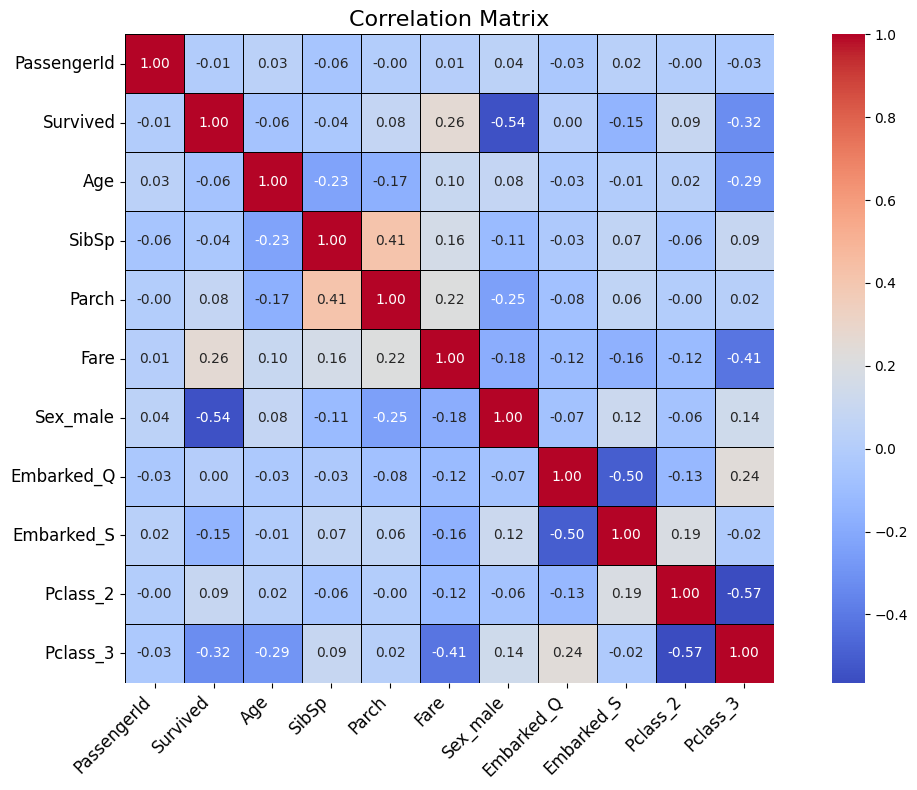

In [14]:
# Correlation Matrix

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Generate the correlation matrix
corr_matrix = train_data.corr()

# Plot the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5, linecolor='black')

# Improve the title and axis labels
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# Display the heatmap
plt.show()

In [31]:
survival_rates_sex = train_data.groupby('Sex_male')['Survived'].mean()
survival_rates_sex

Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64

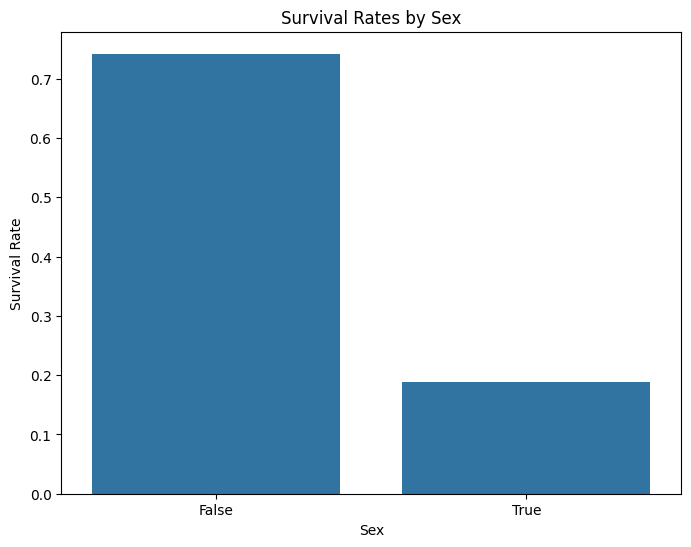

In [18]:
# Visualize the survival rates
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates_sex.index, y=survival_rates_sex.values)
plt.title('Survival Rates by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

In [23]:
train_data["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [46]:
survival_rates_age = train_data.groupby('Age')['Survived'].mean()
survival_rates_age

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

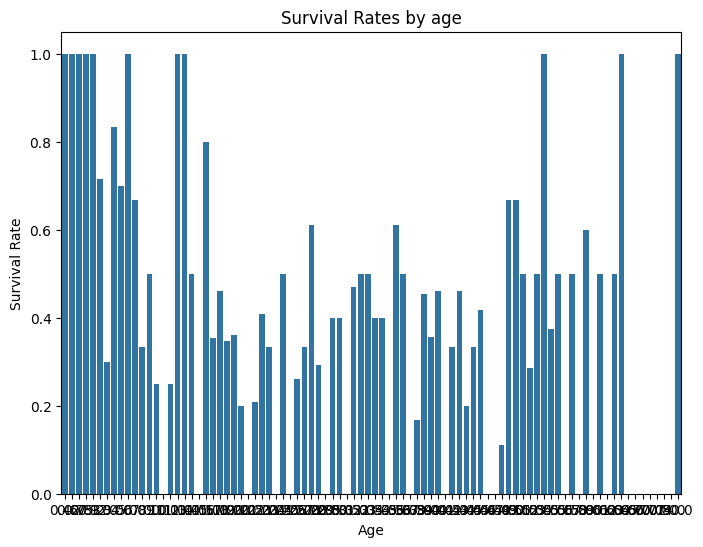

In [47]:
# Visualize the survival rates
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates_age.index, y=survival_rates_age.values)
plt.title('Survival Rates by age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

In [36]:
import pandas as pd

# Assuming train_data is your DataFrame
survival_rates_age = train_data.groupby('Age')['Survived'].mean()

# Create age groups
age_groups = pd.cut(train_data['Age'], bins=[0, 10, 20, 40, 80], labels=['0-10', "10-20", "20-40",'40-80'], right=False)

# Calculate the survival rates for each age group
survival_rates_age_groups = train_data.groupby(age_groups)['Survived'].mean()

print(survival_rates_age_groups)


Age
0-10     0.612903
10-20    0.401961
20-40    0.358156
40-80    0.370370
Name: Survived, dtype: float64


/var/folders/6p/rjdvb99965v0wgz3dm_y1sph0000gn/T/ipykernel_61075/488292659.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates_age_groups = train_data.groupby(age_groups)['Survived'].mean()


In [29]:
import pandas as pd

# Assuming train_data is your DataFrame
survival_rates_age = train_data.groupby('Age')['Survived'].mean()

# Create age groups
age_groups = pd.cut(train_data['Age'], bins=[0, 40, train_data['Age'].max()], labels=['0-40', '40-80'], right=False)

# Calculate the survival rates for each age group
survival_rates_age_groups = train_data.groupby(age_groups)['Survived'].mean()

print(survival_rates_age_groups)


Age
0-40     0.385989
40-80    0.370370
Name: Survived, dtype: float64


/var/folders/6p/rjdvb99965v0wgz3dm_y1sph0000gn/T/ipykernel_61075/1572986293.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates_age_groups = train_data.groupby(age_groups)['Survived'].mean()


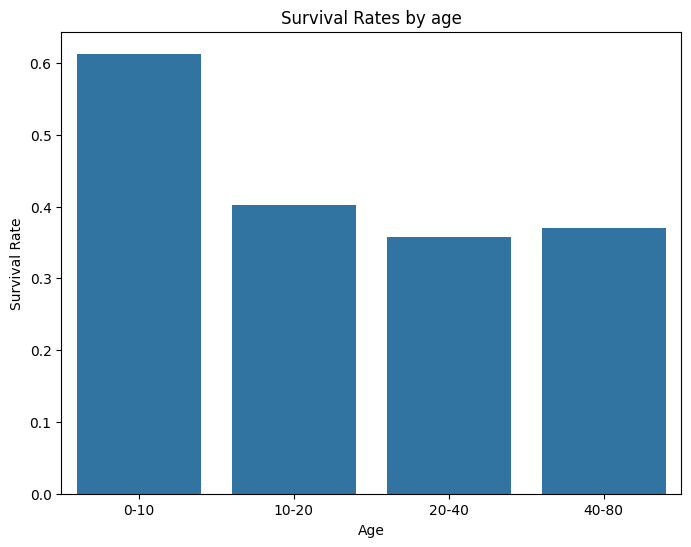

In [37]:
# Visualize the survival rates
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates_age_groups.index, y=survival_rates_age_groups.values)
plt.title('Survival Rates by age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

# Experiment #1

## 1. Alternative Hypothesis (H1): 
* There is an association between sex and survival rates. 
* The observed difference is not due to random chance

## 2. Construct Contingency Table:
* There is an association between sex and survival rates. 
* The observed difference is not due to random chance

## 3. Calculate Chi-Square Statistic
* Compare observed frequencies with expected frequencies under the assumption that the null hypothesis is true.

## 4. Determine p-value:
* The p-value helps to decide whether to reject the null hypothesis. If the p-value is less than the significance level (typically 0.05), we reject the null hypothesis

In [43]:
# Create a contingency table
contingency_table = pd.crosstab(train_data['Age'], train_data['Survived'])
print(contingency_table)

Survived  0  1
Age           
0.42      0  1
0.67      0  1
0.75      0  2
0.83      0  2
0.92      0  1
...      .. ..
70.00     2  0
70.50     1  0
71.00     2  0
74.00     1  0
80.00     0  1

[88 rows x 2 columns]


In [44]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 113.77670967050013, p-value: 0.028588492552294235


In [45]:
# Interpretation of results
if p < 0.05:
    print("There is a significant difference in survival rates between sex.")
else:
    print("There is no significant difference in survival rates between sex.")

There is a significant difference in survival rates between sex.


## Interpretation of Results

### 1. Chi-Square Test Output:
* The p-value obtained from the Chi-Square Test is less than 0.05.

* This p-value threshold (commonly 0.05) is used to determine statistical significance.

### 2. Significant Difference:
* Since the p-value is less than 0.05, we reject the null hypothesis.
* The null hypothesis (H0) stated that there is no association between sex and survival rates
* Rejecting the null hypothesis means we accept the alternative hypothesis (H1), which states that there is an association between sex and survival rates

### Conclusion
* **Significance:** There is a statistically significant difference in survival rates between male and female passengers on the Titanic.

* **Implication:** Gender played a significant role in the likelihood of survival. This could be due to various reasons, such as the "women and children first" policy during the evacuation.

### Detailed Analysis
Given that we found a significant difference, we might want to further investigate:

#### 1. Survival Rates:
* Compare the actual survival rates of males and females to understand the magnitude of the difference.

#### 2. Contextual Factors:
* Consider other factors that might have influenced this result, such as age, class, or social norms at the time

### Additional Insights
We can look at the survival rates for each gender to get more context:

In [ ]:
# Calculate survival rates for each sex
survival_rates_sex = train_data.groupby('Sex_male')['Survived'].mean()
print(survival_rates_sex)

Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64


### Why We Need a Contingency Table?

* **Analyzing Relationships:** A contingency table allows us to observe the relationship between two categorical variables by displaying their frequency distributions.

* **Performing Statistical Tests:** It serves as the basis for performing statistical tests, such as the Chi-Square Test, to determine if there is a significant association between the variables.

* **Visualizing Data:** It provides a clear and concise way to visualize the distribution and interaction of categories.

* **Identifying Patterns:** By examining the frequencies, we can identify patterns and trends in the data.

### What is a Contingency Table?
A contingency table is a matrix format that shows the frequency distribution of the variables. Each cell in the table represents the frequency count of occurrences for a combination of variable categories. For example, in the Titanic dataset, we can create a contingency table to show the relationship between sex (Sex_male) and survival (Survived).

### Importance of Contingency Tables

* **Foundation for Chi-Square Test:** It is essential for performing the Chi-Square Test, which assesses whether there is a significant association between two categorical variables.

* **Data Summary:** It provides a summary of the data in a matrix format, making it easy to understand the distribution and relationship between variables.

* **Data Insight:** Helps in gaining insights into the data by revealing how the frequency of one variable is distributed across the levels of another variable.

In [49]:
train_data["Embarked_Q"].value_counts()

Embarked_Q
False    814
True      77
Name: count, dtype: int64

In [50]:
# Calculate survival rates for each sex
survival_rates_sex = train_data.groupby('Embarked_Q')['Survived'].mean()
print(survival_rates_sex)

Embarked_Q
False    0.383292
True     0.389610
Name: Survived, dtype: float64


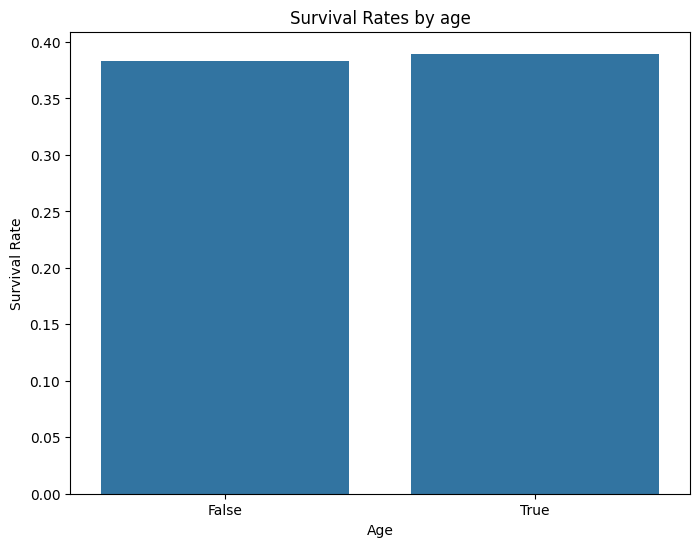

In [51]:
# Visualize the survival rates
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates_sex.index, y=survival_rates_sex.values)
plt.title('Survival Rates by age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

In [52]:
# Create a contingency table
contingency_table = pd.crosstab(train_data['Embarked_Q'], train_data['Survived'])
print(contingency_table)

Survived      0    1
Embarked_Q          
False       502  312
True         47   30


In [53]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 0.0, p-value: 1.0


In [54]:
# Interpretation of results
if p < 0.05:
    print("There is a significant difference in survival rates between sex.")
else:
    print("There is no significant difference in survival rates between sex.")

There is no significant difference in survival rates between sex.
